In [5]:
import cloudpickle
import collections
import numpy as np

In [17]:
dataset_path = 'dataset.pkl'

with open(dataset_path, 'rb') as f:
    trajectories = cloudpickle.load(f)

paths = []

In [16]:
data_path = 'chain.pkl'
with open(data_path, 'rb') as f:
    trac = cloudpickle.load(f)


In [21]:
len(trajectories)
paths = trac

In [22]:
len(trajectories[0][0])

roll = 0
agent = 0 #.. 24
traj = 0 #.. 25600
#key = [obs, action, reward, done, a_probs]
key = [0, 1, 2, 3, 4]
obs = [0, 1]


trajectories[roll][agent][traj][key[0]][obs[0]].shape


data_ = collections.defaultdict(list)

for agent in trajectories[0]:
    data_ = collections.defaultdict(list)
    for exp in agent:
        vis_obs = exp[0][0]
        vec_obs = exp[0][1]
        vis_obs = vis_obs.reshape(-1)
        data_['observations'].append(np.concatenate([vis_obs, vec_obs]))
        data_['actions'].append(exp[1])
        data_['rewards'].append(exp[2])
        data_['terminals'].append(exp[3])
        if exp[3]:
            for k in data_:
                data_[k] = np.array(data_[k])
            paths.append(data_)
            data_ = collections.defaultdict(list)
    # if not exp[3]:
    #     data_['terminals'][-1] = True
    #     for k in data_:
    #         data_[k] = np.array(data_[k])
    #     paths.append(data_)
    #     data_ = collections.defaultdict(list)



In [28]:
len(data_['observations'])
len(paths)

288

In [26]:
returns = np.array([np.sum(p['rewards']) for p in paths])
num_samples = np.sum([p['rewards'].shape[0] for p in paths])

In [27]:
print(f'Number of samples collected: {num_samples}')
print(f'Trajectory returns: mean = {np.mean(returns)}, std = {np.std(returns)}, max = {np.max(returns)}, min = {np.min(returns)}')

Number of samples collected: 576240
Trajectory returns: mean = 312.9513888888889, std = 40.1382731354154, max = 440.0, min = 180.0


In [25]:
import pickle

with open('chain.pkl', 'wb') as f:
    pickle.dump(paths, f)

In [12]:
np.max(paths[0]['actions'])

6.0

In [11]:
for k in data_:
    print(k)

observations
actions
rewards
terminals


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt



/tmp/ipykernel_6669/1566953234.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns, )


<Axes: ylabel='Density'>

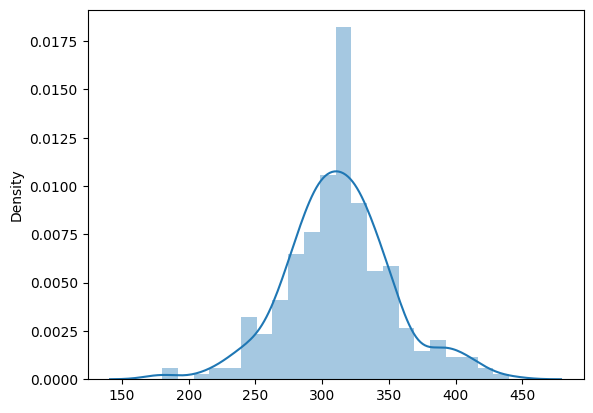

In [53]:
#show the distribution of returns with exact numbers on the top
sns.distplot(returns,)

<BarContainer object of 24 artists>

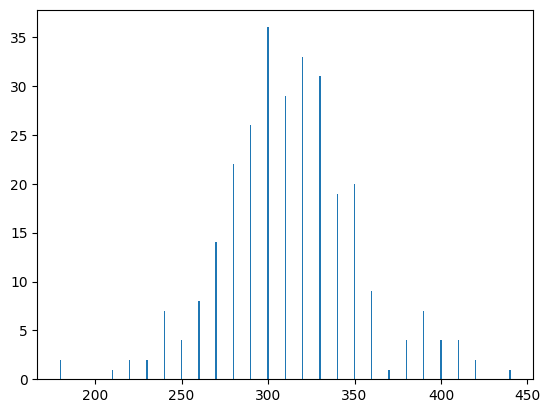

In [47]:
cc = collections.Counter(returns)
plt.bar(cc.keys(), cc.values())

In [48]:
cc

Counter({310.0: 29,
         260.0: 8,
         270.0: 14,
         320.0: 33,
         300.0: 36,
         290.0: 26,
         330.0: 31,
         280.0: 22,
         240.0: 7,
         340.0: 19,
         250.0: 4,
         350.0: 20,
         390.0: 7,
         360.0: 9,
         380.0: 4,
         410.0: 4,
         420.0: 2,
         400.0: 4,
         440.0: 1,
         230.0: 2,
         210.0: 1,
         220.0: 2,
         180.0: 2,
         370.0: 1})